*http://archive.ics.uci.edu/ml/datasets/Car+Evaluation*

### All needed imports

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 80

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
header_list = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class value']
cars = pd.read_csv('car.data', names=header_list, index_col=None)

## Exploring Data

In [3]:
cars.head(10)

,buying,maint,doors,persons,lug_boot,safety,class value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,class value
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,med,high,unacc
freq,432,432,432,576,576,576,1210


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying         1728 non-null object
maint          1728 non-null object
doors          1728 non-null object
persons        1728 non-null object
lug_boot       1728 non-null object
safety         1728 non-null object
class value    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
cars.shape

(1728, 7)

#### Frequency destribution of values in each variable

In [7]:
for column in cars.columns:
    print(cars[column].value_counts(), '\n') 

vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64 

vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64 

3        432
5more    432
4        432
2        432
Name: doors, dtype: int64 

more    576
4       576
2       576
Name: persons, dtype: int64 

med      576
big      576
small    576
Name: lug_boot, dtype: int64 

high    576
low     576
med     576
Name: safety, dtype: int64 

unacc    1210
acc       384
good       69
vgood      65
Name: class value, dtype: int64 



In [8]:
# check missing values in variables

cars.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
class value    0
dtype: int64

#### I had an idea that number of doors can somehow correlate with luggage capacity, but seems that *lug_boot* value does not depended on that

In [9]:
cars.loc[cars['doors'] == '4']

,buying,maint,doors,persons,lug_boot,safety,class value
54,vhigh,vhigh,4,2,small,low,unacc
55,vhigh,vhigh,4,2,small,med,unacc
56,vhigh,vhigh,4,2,small,high,unacc
57,vhigh,vhigh,4,2,med,low,unacc
58,vhigh,vhigh,4,2,med,med,unacc
...,...,...,...,...,...,...,...
1696,low,low,4,more,med,med,good
1697,low,low,4,more,med,high,vgood
1698,low,low,4,more,big,low,unacc
1699,low,low,4,more,big,med,good


In [10]:
cars.loc[:, ['doors', 'lug_boot']]

,doors,lug_boot
0,2,small
1,2,small
2,2,small
3,2,med
4,2,med
...,...,...
1723,5more,med
1724,5more,med
1725,5more,big
1726,5more,big


In [11]:
a = cars.loc[cars['doors'] == '2', ['lug_boot']]
b = cars.loc[cars['doors'] == '3', ['lug_boot']]
c = cars.loc[cars['doors'] == '4', ['lug_boot']]
d = cars.loc[cars['doors'] == '5more', ['lug_boot']]

print(a['lug_boot'].value_counts(), '\n\n', b['lug_boot'].value_counts(), '\n\n', 
      c['lug_boot'].value_counts(), '\n\n', d['lug_boot'].value_counts())

med      144
big      144
small    144
Name: lug_boot, dtype: int64 

 med      144
big      144
small    144
Name: lug_boot, dtype: int64 

 med      144
big      144
small    144
Name: lug_boot, dtype: int64 

 med      144
big      144
small    144
Name: lug_boot, dtype: int64


#### *Stratified Sampling* is not needed since all data instances seem to be good splitted

In [12]:
cars

,buying,maint,doors,persons,lug_boot,safety,class value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#### Feature Vector and Target Vector

In [13]:
X = cars.drop(['class value'], axis=1)
y = cars['class value']

X, y

(     buying  maint  doors persons lug_boot safety
 0     vhigh  vhigh      2       2    small    low
 1     vhigh  vhigh      2       2    small    med
 2     vhigh  vhigh      2       2    small   high
 3     vhigh  vhigh      2       2      med    low
 4     vhigh  vhigh      2       2      med    med
 ...     ...    ...    ...     ...      ...    ...
 1723    low    low  5more    more      med    med
 1724    low    low  5more    more      med   high
 1725    low    low  5more    more      big    low
 1726    low    low  5more    more      big    med
 1727    low    low  5more    more      big   high
 
 [1728 rows x 6 columns], 0       unacc
 1       unacc
 2       unacc
 3       unacc
 4       unacc
         ...  
 1723     good
 1724    vgood
 1725    unacc
 1726     good
 1727    vgood
 Name: class value, Length: 1728, dtype: object)

#### Splitting data into training and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [15]:
X_train.shape, X_test.shape

((1036, 6), (692, 6))

In [16]:
y_train.shape, y_test.shape

((1036,), (692,))

## Since the task to predict value of a car a abviously a classifcation one, let's try to implement two methodologies: 
<br>

<ol>
    <h3><li>Decision Trees</li></h3>
    <h3><li>Support Vector Machines</li></h3>
</ol>

In [17]:
cars.dtypes

buying         object
maint          object
doors          object
persons        object
lug_boot       object
safety         object
class value    object
dtype: object

## 1. Decision Trees

#### Encoding 

#### There are a limited number of possible values, each of which represents a category, which menas that all the variables in dataset are of *ordinal* categorical data type. Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:

In [18]:
X_train

,buying,maint,doors,persons,lug_boot,safety
615,high,high,4,more,med,low
294,vhigh,med,4,more,big,low
712,high,med,4,4,small,med
1720,low,low,5more,more,small,med
88,vhigh,vhigh,5more,2,big,med
...,...,...,...,...,...,...
1130,med,med,3,more,med,high
1294,med,low,5more,more,big,med
860,high,low,5more,more,med,high
1459,low,high,4,2,small,med


In [19]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,med,high
1201,med,low,2,4,med,med
628,high,high,5more,2,big,med
1498,low,high,5more,4,med,med
1263,med,low,4,more,med,low
...,...,...,...,...,...,...
1232,med,low,3,4,big,high
1477,low,high,4,more,small,med
636,high,high,5more,4,big,low
1211,med,low,2,more,med,high


In [20]:
columns_encode = []
columns_encode.append(header_list)
columns_encode

[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class value']]

In [21]:
ordinal_encoder = OrdinalEncoder()

X_train = ordinal_encoder.fit_transform(X_train, columns_encode)
X_test = ordinal_encoder.transform(X_test)

In [22]:
X_train, X_train.shape

(array([[0., 0., 2., 2., 1., 1.],
        [3., 2., 2., 2., 0., 1.],
        [0., 2., 2., 1., 2., 2.],
        ...,
        [0., 1., 3., 2., 1., 0.],
        [1., 0., 2., 0., 2., 2.],
        [2., 2., 1., 2., 2., 2.]]), (1036, 6))

In [23]:
X_test, X_test.shape

(array([[0., 0., 2., 0., 1., 0.],
        [2., 1., 0., 1., 1., 2.],
        [0., 0., 3., 0., 0., 2.],
        ...,
        [0., 0., 3., 1., 0., 1.],
        [2., 1., 0., 2., 1., 0.],
        [0., 1., 3., 2., 1., 2.]]), (692, 6))

In [40]:
y_train, y_train.shape

(615     unacc
 294     unacc
 712     unacc
 1720      acc
 88      unacc
         ...  
 1130    vgood
 1294     good
 860       acc
 1459    unacc
 1126      acc
 Name: class value, Length: 1036, dtype: object, (1036,))

### Decision Tree Classifier with criterion gini index

In [24]:
dtc_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# fit the model
dtc_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [25]:
y_pred_gini = dtc_gini.predict(X_test)

#### Checking accuracy score of DT with gini index criteria

In [26]:
accuracy_score(y_test, y_pred_gini)

0.7630057803468208

####  Comparing the train-set and test-set accuracy for overfitting

In [27]:
y_pred_train_gini = dtc_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [28]:
accuracy_score(y_train, y_pred_train_gini)

0.777027027027027

### Judging by this scores, model is fine

In [29]:
dtc_gini.score(X_train, y_train), dtc_gini.score(X_test, y_test)

(0.777027027027027, 0.7630057803468208)

#### Visualizing DT model with gini

[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\ngini = 0.452\nsamples = 1036\nvalue = [228, 40, 730, 38]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 342\nvalue = [0, 0, 342, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\ngini = 0.573\nsamples = 694\nvalue = [228, 40, 388, 38]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.634\nsamples = 232\nvalue = [122, 16, 56, 38]'),
 Text(83.7, 54.360000000000014, 'gini = 0.609\nsamples = 167\nvalue = [94, 16, 19, 38]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.49\nsamples = 65\nvalue = [28, 0, 37, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\ngini = 0.428\nsamples = 462\nvalue = [106, 24, 332, 0]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 225\nvalue = [0, 0, 225, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.586\nsamples = 237\nvalue = [106, 24, 107, 0]')]

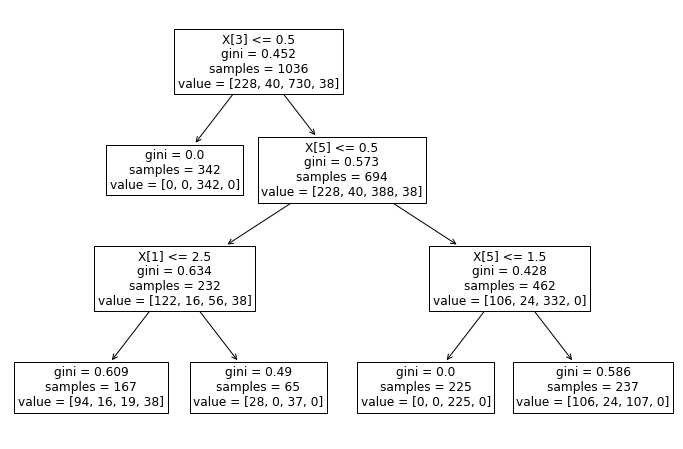

In [30]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dtc_gini.fit(X_train, y_train)) 

### Decision Tree with criterion entropy

In [31]:
dtc_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)


# fit the model
dtc_en.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [32]:
y_pred_entropy = dtc_en.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred_entropy)

0.7630057803468208

In [34]:
y_pred_train_entropy = dtc_en.predict(X_train)

y_pred_train_entropy

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [35]:
accuracy_score(y_train, y_pred_train_entropy)

0.777027027027027

### Still, the model is doing fine

#### Visualizing

[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\nentropy = 1.193\nsamples = 1036\nvalue = [228, 40, 730, 38]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 342\nvalue = [0, 0, 342, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\nentropy = 1.463\nsamples = 694\nvalue = [228, 40, 388, 38]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 2.5\nentropy = 1.676\nsamples = 232\nvalue = [122, 16, 56, 38]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.634\nsamples = 167\nvalue = [94, 16, 19, 38]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.986\nsamples = 65\nvalue = [28, 0, 37, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\nentropy = 1.052\nsamples = 462\nvalue = [106, 24, 332, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.0\nsamples = 225\nvalue = [0, 0, 225, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 1.372\nsamples = 237\nvalue = [106, 24, 107, 0]')]

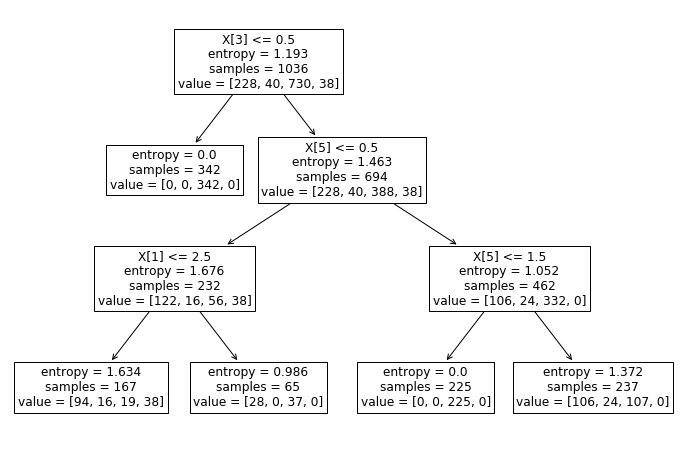

In [36]:
plt.figure(figsize=(12,8))

tree.plot_tree(dtc_en.fit(X_train, y_train)) 

### Evaluating Model

### Confusion Matrix

In [37]:
cm = confusion_matrix(y_test, y_pred_entropy)

In [38]:
cm

array([[ 64,   0,  92,   0],
       [ 14,   0,  15,   0],
       [ 16,   0, 464,   0],
       [ 27,   0,   0,   0]])

### Classification Report

In [39]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

         acc       0.53      0.41      0.46       156
        good       0.00      0.00      0.00        29
       unacc       0.81      0.97      0.88       480
       vgood       0.00      0.00      0.00        27

    accuracy                           0.76       692
   macro avg       0.34      0.34      0.34       692
weighted avg       0.68      0.76      0.72       692



---

## 2. Support Vector Machines Nonlinear Classification

In [41]:
X_train

array([[0., 0., 2., 2., 1., 1.],
       [3., 2., 2., 2., 0., 1.],
       [0., 2., 2., 1., 2., 2.],
       ...,
       [0., 1., 3., 2., 1., 0.],
       [1., 0., 2., 0., 2., 2.],
       [2., 2., 1., 2., 2., 2.]])

In [43]:
X_test

array([[0., 0., 2., 0., 1., 0.],
       [2., 1., 0., 1., 1., 2.],
       [0., 0., 3., 0., 0., 2.],
       ...,
       [0., 0., 3., 1., 0., 1.],
       [2., 1., 0., 2., 1., 0.],
       [0., 1., 3., 2., 1., 2.]])

In [44]:
y_train

615     unacc
294     unacc
712     unacc
1720      acc
88      unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: class value, Length: 1036, dtype: object

In [45]:
y_test

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
        ...  
1232    vgood
1477      acc
636     unacc
1211     good
859       acc
Name: class value, Length: 692, dtype: object

### Gaussian RBF Kernel

#### Let's use GridSearch to find best hyperparameters

In [48]:
from sklearn.svm import SVC # SVM model with kernels
from sklearn.model_selection import GridSearchCV


param_grid = [{'kernel': ['poly'], 'C' : [3, 5, 7, 9, 10]},
             {'kernel' : ['rbf'], 'C' : [3, 5, 7, 9, 10], 'gamma' : [2, 4, 6, 8]}]

svm = SVC()

In [49]:
grid_search = GridSearchCV(svm, param_grid, return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [3, 5, 7, 9, 10], 'kernel': ['poly']},
                         {'C': [3, 5, 7, 9, 10], 'gamma': [2, 4, 6, 8],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [50]:
grid_search.best_params_

{'C': 9, 'kernel': 'poly'}

In [51]:
grid_search.best_estimator_

SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
svm_y_pred = grid_search.predict(X_test)

accuracy_score(y_test, svm_y_pred)

0.8815028901734104

In [53]:
svm_y_pred_train = grid_search.predict(X_train)

svm_y_pred_train

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [54]:
accuracy_score(y_train, svm_y_pred_train)

0.9083011583011583

In [55]:
confusion_matrix(y_test, svm_y_pred)

array([[108,   3,  38,   7],
       [  2,  22,   5,   0],
       [ 15,   0, 464,   1],
       [  6,   0,   5,  16]])